# Classification using Basic Image Processing

We will perform the classification of Nuts and Bolts using basic image processing and an "IF"
This is to get you familiar with the Basic image processing functions using Scikit-Image
Before you work on the data / image, you may have to pre-process them to get uniformity and better performance

These are stages in this Classification process
* Pre-processing & Binarizing
* Contour Detection
* Feature extraction
* Thresholding (classifying)

### Pre-processing

In [2]:
# Import necessary modules
from skimage import io, color
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# Read the image and Convert it to Grayscale
image = io.imread('../data/nuts_bolts_v1/nut.png')
gray_img = (color.rgb2gray(image) * 255).astype(np.uint8)

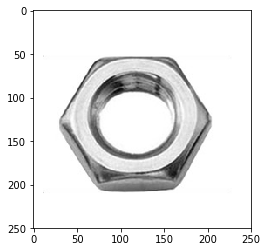

In [4]:
plt.imshow(gray_img, 'gray')
plt.show()

### Binarizing and Cleaning

In [17]:
# Binarize the image using Adaptive thresholding
from skimage.filters import threshold_otsu
thresh = threshold_otsu(gray_img)
bin_img = gray_img < 250

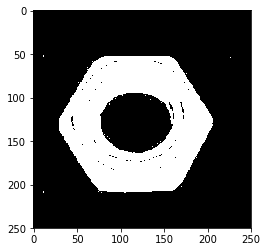

In [18]:
plt.imshow(bin_img, 'gray')
plt.show()

In [37]:
# Close the holes by Morphological operations (Erosion and Dilation)
from skimage.morphology import binary_erosion, binary_opening, binary_dilation
smooth_bin_img = binary_erosion(bin_img)
smooth_bin_img = binary_dilation(smooth_bin_img)
smooth_bin_img = binary_dilation(smooth_bin_img)
smooth_bin_img = binary_dilation(smooth_bin_img)
#smooth_bin_img = binary_closing(smooth_bin_img)

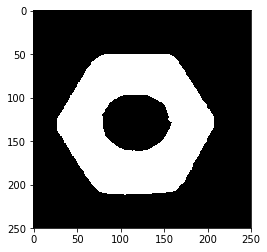

In [38]:
plt.imshow(smooth_bin_img, 'gray')
plt.show()

### Contour Detection

In [39]:
# Find all the contours from the binary image
from skimage.measure import find_contours
contours = find_contours(smooth_bin_img, 0.8)

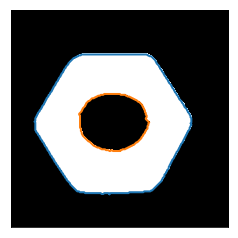

In [40]:
# Display the image and plot all contours found
fig, ax = plt.subplots()
ax.imshow(smooth_bin_img, interpolation='nearest', cmap=plt.cm.gray)

for n, contour in enumerate(contours):
    ax.plot(contour[:, 1], contour[:, 0], linewidth=2)

ax.axis('image')
ax.set_xticks([])
ax.set_yticks([])
plt.show()

In [41]:
print(len(contours))

2


### Feature extraction

Find the below two features
1. Copactness
2. Circularity

(Explain the math formula here)
#### Compactness
It is defined by White area / Contour area

In [ ]:
# Find the compactness
contour_area = 

#### Circularity
It is defined by Contour area / Rectangular area

In [42]:
# Find the circularity

### Thresholding

In [43]:
# Use if to classify it into a Nut or a Bolt